In [9]:
pv_names = ['BPMS:L0B:0183:FW:X_SLOW',
            'BPMS:L0B:0183:FW:Y_SLOW',
            'BPMS:HTR:120:FW:X_SLOW', 
            'BPMS:HTR:120:FW:Y_SLOW',
            'BPMS:GUNB:925:FW:X_SLOW',
            'BPMS:GUNB:925:FW:Y_SLOW',
            'SCOP:AMRF:RF01:AI_MEAS1',
            'SCOP:AMRF:RF01:AI_MEAS2',
            'SCOP:AMRF:RF01:AI_MEAS3',
            'SCOP:AMRF:RF01:AI_MEAS4',
            'SCOP:AMRF:RF03:AI_MEAS1',
            'SCOP:AMRF:RF03:AI_MEAS2',
            'SCOP:AMRF:RF03:AI_MEAS3',	
            'SCOP:AMRF:RF03:AI_MEAS4',	
            'TORO:GUNB:360:CHRG']

plot_names = ['CM BPM X', 
              'CM BPM Y',
              'HTR BPM X',
              'HTR BPM Y',
              'GUN BPM X',
              'GUN BPM Y',
              'HOM C1',
              'HOM C2',
              'HOM C3',
              'HOM C4',
              'HOM C5',
              'HOM C6',
              'HOM C7',	
              'HOM C8',	
              'Charge']

charge_vals = [0.2785387486219406, 0.3997775077819824, 0.4645740290482839, 0.5125857472419739,
               0.6366457541783651, 1.8790562972426414, 1.9854518473148346, 2.0720774275915965,
               65.15696843465169, 68.09078216552734]

timestamps = ['2024/02/24 16:00:00', '2024/02/24 20:00:00']

In [10]:
# imports
import sys
sys.path.append('/Users/jonathontordilla/Desktop/hombom24/archive-analysis/lcls-tools-plots/lcls_tools') # path to tools 
import common.data_analysis.archiver as arch # type: ignore
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# specify a start/end date
start_date = timestamps[0]
end_date = timestamps[1]
format_string = "%Y/%m/%d %H:%M:%S"
start_date_obj = datetime.strptime(start_date, format_string)
end_date_obj = datetime.strptime(end_date, format_string)

# submit request for the 3 PVs
data = arch.get_values_over_time_range(["SCOP:AMRF:RF01:AI_MEAS1", "BPMS:L0B:0183:FW:X_SLOW", "TORO:GUNB:360:CHRG"], start_date_obj, end_date_obj)
# create a dictionary for each PV, access it with timestamps and values methods from archiver.py
hom_dict = data["SCOP:AMRF:RF01:AI_MEAS1"]
hom_timestamps = hom_dict.timestamps
hom_values = hom_dict.values
bpm_dict = data["BPMS:L0B:0183:FW:X_SLOW"]
bpm_timestamps = bpm_dict.timestamps
bpm_values = bpm_dict.values
toro_dict = data["TORO:GUNB:360:CHRG"]
toro_timestamps = toro_dict.timestamps
toro_values = toro_dict.values

# Clean timestamps 
hom_clean_timestamps = [hom_timestamps[i].strftime('%m/%d/%Y %H:%M:%S') for i in range(len(hom_timestamps))]
bpm_clean_timestamps = [bpm_timestamps[i].strftime('%m/%d/%Y %H:%M:%S') for i in range(len(bpm_timestamps))]
toro_clean_timestamps = [toro_timestamps[i].strftime('%m/%d/%Y %H:%M:%S') for i in range(len(toro_timestamps))]

# DataFrame for each PV
df_hom = pd.DataFrame({"timestamps": hom_clean_timestamps, "SCOP:AMRF:RF01:AI_MEAS1": hom_values})
df_bpm = pd.DataFrame({"timestamps": bpm_clean_timestamps, "BPMS:L0B:0183:FW:X_SLOW": bpm_values})
df_toro = pd.DataFrame({"timestamps": toro_clean_timestamps, "TORO:GUNB:360:CHRG": toro_values})

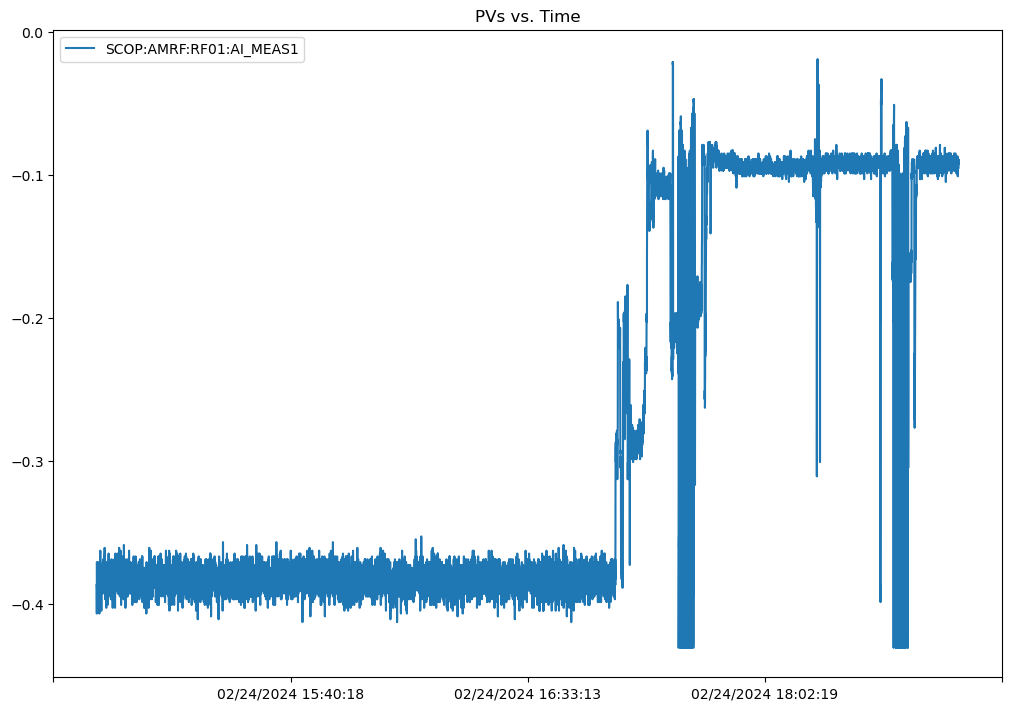

In [14]:
# graph over time
fig, ax = plt.subplots(figsize=(10, 7), layout='constrained')
ax.plot(df_hom["timestamps"], df_hom["SCOP:AMRF:RF01:AI_MEAS1"], label="SCOP:AMRF:RF01:AI_MEAS1")
# ax.scatter(df_bpm["timestamps"], df_bpm["BPMS:L0B:0183:FW:X_SLOW"], label="BPMS:L0B:0183:FW:X_SLOW")
# ax.scatter(df_toro["timestamps"], df_toro["TORO:GUNB:360:CHRG"], label="TORO:GUNB:360:CHRG")
ax.xaxis.set_major_locator(ticker.LinearLocator(5))
ax.set_title("PVs vs. Time") 
ax.legend() 
plt.show()